In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import joblib

# 1. AI และ Machine Learning

> การเขียนโปรแกรมแบบทั่วไป (Traditional Programming) คือการเขียนโปรแกรมตามความต้องการ (Logic) แตะ Machine Learning จะมี Model ซึ่งจะต้องนำชุดข้อมูลไปสอนให้คอมพิวเตอร์เรียนรู้เพื่อสร้าง Model เช่น
  * จับภาพใบหน้า
  * ทำนาย / พยากรณ์ / คาดการณ์

> ซึ่ง Machine Learning จะเรียนรู้แค่ซึ่งที่เกี่ยวข้องกับสิ่งที่เรียนรู้เท่านั้น และสามารถแบ่งเป็น 3 ประเภท ดังนี้





## 1.1 ประเภทของ Machine Learning

### 1.1.1 Supervised Learning (การเรียนรู้แบบมีการสอน)


> มี Training data หรือ Training set โดยการเทรนให้รู้จักข้อมูลจำนวนมาก และแบ่งเป็นกลุ่มย่อยได้ดังนี้
  * Classification
    * การจำแนก แยกแยะ
  * Regression
    * การคำนวณ ทำนายค่าเป็นตัวเลข



### 1.1.2 Unsupervised Learning


> เป็นการเรียนรู้แบบไม่มีไม่มีการเรียนรู้ ลักษณะการทำงานคือการป้อนข้อมูลที่ต้องการจะทำนาย และระบบจะทำการประมวลผลให้ โดยการเรียนรู้นี้แบ่งออกเป็น
  * Clustering
    * การจัดกลุ่ม
  * Association
    * การหาความสัมพันธ์


### 1.1.3 Reinforcement Learning


> เป็นการเรียนรุ้ที่อาสัยการป้อนกลับแล้วให้ระบบเรียนรู้และปรับปรุงตัวเอง เช่น ระบบการทรงตัวของหุ่นยนต์




# 2. การเขียนโปรแกรมไม่ใช้ Machine Learning


> การคำนวณสูตรสมการเส้นตรง


```
y = slope * x + b
```
หรือ
```
y = m x+b
```


```
b = y - (m * x)
```


y = สิ่งที่การต้องการหา (Output)

slope = ความชันของเส้น (m)

x = ค่า Input

b = จุดตัดบนแกน x, y


```
slope = y2-y1 / x2-x1
```

In [2]:
df = pd.DataFrame({"x" : [1.0 ,1.8 ,3.0 ,4.1 ,5.2 ,6.0], "y" : [1 ,1.3 ,2.2 ,2.5 ,2.8, 3.6]})
df

,x,y
0,1.0,1.0
1,1.8,1.3
2,3.0,2.2
3,4.1,2.5
4,5.2,2.8
5,6.0,3.6


In [3]:
df.y[1]

1.3

In [4]:
m1 = (1.3 - 1) / (1.8 - 1)
m1

0.37500000000000006

In [5]:
m1 = (df.y[1] - df.y[0]) / (df.x[1] - df.x[0])
m1

0.37500000000000006

In [6]:
df.y.mean()

2.2333333333333334

In [7]:
df.x.mean()

3.516666666666666

In [8]:
b = 2.24 - (0.38 * 3.52)
b

0.9024000000000001

In [9]:
b1 = df.y[0] - (m1 * df.x[0])
b1

0.625

บริษัท k เก็บเงินลงทุนค่าโฆษณาดังตาราง ต้องการคำนวณว่า หากลงทุน 2.5 ล้าน จะมีผลกำไรเท่าไหร่

In [10]:
# y = m x+b
# x อยากลงทุน 2.5 ล้าน หาค่า y

  #b = y -( m * x )

x_in = 2.5

y_out = m1 * (2.5 + b1)

print("บริษัท k จะได้กำไร", y_out, 'ล้านบาท')

บริษัท k จะได้กำไร 1.1718750000000002 ล้านบาท


In [11]:
# กรณีที่ input มีหลายค่า

x_int = [2.5, 3, 3.5, 4, 4.5, 5]

for y in x_int:
  y_out2 = m1 * (x_int + b1)

df = pd.DataFrame({"ถ้าลงทุน" : x_int, "ผลกำไร": y_out2})
df

,ถ้าลงทุน,ผลกำไร
0,2.5,1.171875
1,3.0,1.359375
2,3.5,1.546875
3,4.0,1.734375
4,4.5,1.921875
5,5.0,2.109375


# 3. การเขียนโปรแกรมโดยใช้ Machine Learning

## 3.1 Model


> หลักการคำนวณการประมวลผล ซึ่งก็เปรียบเสมือนสมการกราฟเส้นตรงจากข้อที่ 2 โดยเราจะให้ระบบสร้าง Model (สมการ) เองโดยการป้อน Data และ Output อย่างเหมาะสม



In [12]:
x_data = [1.0, 1.8, 3.0, 4.1, 5.2, 6.0]
y_data = [1, 1.3, 2.2, 2.5, 2.8, 3.6]

x = np.array(x_data)
y = np.array(y_data)

In [13]:
x

array([1. , 1.8, 3. , 4.1, 5.2, 6. ])

In [14]:
y

array([1. , 1.3, 2.2, 2.5, 2.8, 3.6])

> และก่อนที่จะสร้าง Model ควรจะตรวจสอบพล็อตกราฟก่อน

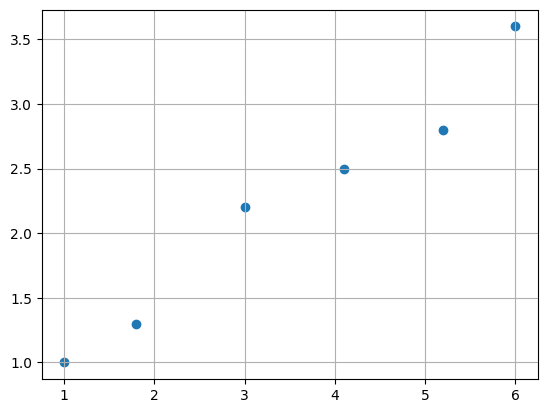

In [15]:
plt.scatter(x,y)
plt.grid()
plt.show()



> เมื่อแนวโน้มของกราฟสูงขึ้นจะจัดเป็น Linear Regression โดยการใช้ Scikit-learn และข้อมูลที่เราได้ป้อนเป็น Data set หรือ Training set จะต้องเปลี่ยนให้เป็น Matrix โดยใช้คำสั่ง


```
.reshape(-1,1)
```

In [16]:
x = x.reshape(-1,1)
x

array([[1. ],
       [1.8],
       [3. ],
       [4.1],
       [5.2],
       [6. ]])

In [17]:
y = y.reshape(-1,1)
y

array([[1. ],
       [1.3],
       [2.2],
       [2.5],
       [2.8],
       [3.6]])



> เมื่อได้ข้อมูลแบบ Matrix มาแล้วจึงจะเริ่มสร้างเป็น Model ด้วยการ Train และใช้คำสั่ง


```
model = LinearRegression()
model.fit(x,y)
```


> เสร็จแล้วเราจะได้ Model ซึ่งเป็นสมการในข้อที่ 2 และการคำนวณจะต้องทำให้เป็น List จากข้อกำหนดของ Scikit-Learn

In [18]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [19]:
# input ค่าเดียว
model.predict([[2.5]])

array([[1.73670696]])

In [20]:
# input หลายค่า

x_input = [[2.0],
           [2.5],
           [3.0],
           [3.5],
           [5.0]]

y_predict = model.predict(x_input)
y_predict

array([[1.49246448],
       [1.73670696],
       [1.98094944],
       [2.22519192],
       [2.95791935]])

In [21]:
y_predict[2][0]

1.980949439689403

In [22]:
y_predict[1][0]

1.73670696196947

In [23]:
# reshape input

x_input = [2, 2.5, 3, 3.5, 5]
x_input = np.array(x_input).reshape(-1,1)

y_predict = model.predict(x_input)
y_predict

array([[1.49246448],
       [1.73670696],
       [1.98094944],
       [2.22519192],
       [2.95791935]])

## 3.2 การดูเส้นจากสมการ Model

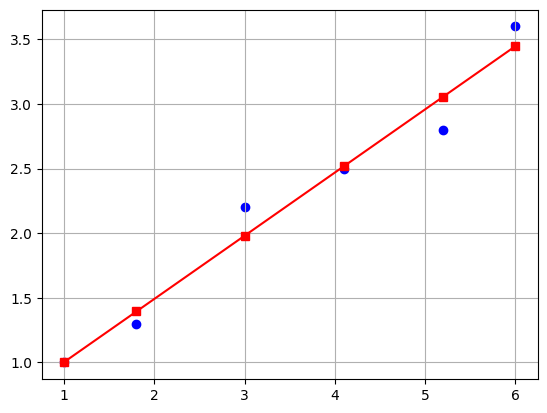

In [24]:
prd = model.predict(x)

plt.grid()
plt.scatter(x,y, color = 'b')
plt.plot(x, prd, color = 'r', marker = 's')

plt.show()



> การดูค่า slope ( m ) และค่าจุดตัด ( b )



In [25]:
model.coef_, model.intercept_

(array([[0.48848496]]), array([0.51549457]))

## 3.3 การบันทึกและเรียกใช้งาน Model


```
joblib.dump
```



In [26]:
joblib.dump(model, 'modeltest01.pkl')

['modeltest01.pkl']

## 3.4 การนำ Model มาใช้งานในโปรแกรม


```
model = joblib.load(file)
```

In [27]:
model = joblib.load('modeltest01.pkl')

# 4. Algorithm and Model (ref ChatGPT)

โมเดล (Model) และอัลกอริทึ่ม (Algorithm) เป็นสองแนวคิดที่สำคัญในด้านการเรียนรู้ของเครื่อง (Machine Learning) และการวิเคราะห์ข้อมูล (Data Analysis) ทั้งสองมีบทบาทสำคัญแต่มีความหมายและการใช้งานที่แตกต่างกันดังนี้

## 4.1 Algorithm
อัลกอริทึ่มคือกระบวนการหรือชุดของกฎที่ถูกออกแบบมาเพื่อทำงานบางอย่างหรือแก้ปัญหาบางอย่างอย่างเป็นขั้นเป็นตอน

ในการเรียนรู้ของเครื่อง อัลกอริทึ่มถูกใช้เพื่อเรียนรู้รูปแบบจากข้อมูล (training data) และสร้างโมเดล โดยการปรับค่าพารามิเตอร์ต่างๆ ตามข้อมูลที่ได้รับ เช่น 
* อัลกอริทึ่มการถดถอยเชิงเส้น (Linear Regression)
* การจัดกลุ่มเคมีนส์ (K-means Clustering)
* การถดถอยลอจิสติก (Logistic Regression)
* การเรียนรู้ต้นไม้ตัดสินใจ (Decision Tree Learning)

## 4.2 Model
โมเดลคือผลลัพธ์หรือการแสดงผลที่ได้จากการนำอัลกอริทึ่มไปใช้กับข้อมูล โมเดลคือสิ่งที่เรียนรู้มาจากข้อมูลซึ่งสามารถใช้ในการทำนายหรือตัดสินใจได้

เมื่ออัลกอริทึ่มเรียนรู้จากข้อมูล มันจะสร้างโมเดลซึ่งประกอบไปด้วยพารามิเตอร์ที่ถูกปรับแต่งให้เหมาะสมกับข้อมูล โมเดลนี้จะถูกใช้ในการทำนายหรือจำแนกข้อมูลใหม่ๆ g=jo
* Linear Regression อาจเป็นสมการเชิงเส้นที่สามารถใช้ในการทำนายค่าผลลัพธ์จากค่าปัจจัยที่กำหนด
* Random Forest อาจเป็นชุดของต้นไม้ตัดสินใจที่สามารถใช้ในการจำแนกข้อมูลใหม่

## 4.3 Algorithm VS Model

1. กระบวนการ
    * อัลกอริทึ่มเป็นกระบวนการที่ใช้ในการเรียนรู้จากข้อมูล 
    * โมเดลเป็นผลลัพธ์ที่ได้จากกระบวนการนั้น
* การสร้างและการใช้งาน
    * ใช้ข้อมูลในการฝึกอัลกอริทึ่มเพื่อสร้างโมเดล เมื่อโมเดลถูกสร้างขึ้นแล้วจะสามารถใช้โมเดลนั้นในการทำนายหรือตัดสินใจจากข้อมูลใหม่
* ความสัมพันธ์
    * อัลกอริทึ่มเป็นเหมือนพ่อครัวที่ใช้สูตรการทำอาหาร (กระบวนการ) ในการทำอาหาร (โมเดล) อาหารที่ได้ก็สามารถนำมาใช้กิน (ทำนายหรือตัดสินใจ) ได้

#### หรือสรุปง่ายๆ โมเดลคืออาหาร ซึ่งอัลกอริทึ่มคือวิธีการทำอาหารจานนั้น ไม่ว่าจะ ทอด หุง ต้ม หรือใดๆก็ตาม จากนั้นเราจึงจะไปสู่กระบวนการการทำนายข้อมูลจากข้อมูลเดิมที่มี